In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [154]:
ds=pd.read_csv("E:/Datatrained/Practise_Project/bigdatamart/bigdatamart_train.csv")

In [155]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [156]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [157]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
ds["Item_Weight"] = ds["Item_Weight"].fillna(value=ds["Item_Weight"].median())

In [159]:
ds["Outlet_Size"] = ds["Outlet_Size"].fillna(ds["Outlet_Size"].mode()[0])

In [160]:
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [161]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
ds['Item_Identifier']= label_encoder.fit_transform(ds['Item_Identifier'])
ds['Item_Fat_Content']= label_encoder.fit_transform(ds['Item_Fat_Content'])
ds['Item_Type']= label_encoder.fit_transform(ds['Item_Type'])
ds['Outlet_Identifier']= label_encoder.fit_transform(ds['Outlet_Identifier'])
ds['Outlet_Size']= label_encoder.fit_transform(ds['Outlet_Size'])
ds['Outlet_Location_Type']= label_encoder.fit_transform(ds['Outlet_Location_Type'])
ds['Outlet_Type']= label_encoder.fit_transform(ds['Outlet_Type'])

  

In [162]:
ds['Item_Identifier'].head()

0     156
1       8
2     662
3    1121
4    1297
Name: Item_Identifier, dtype: int32

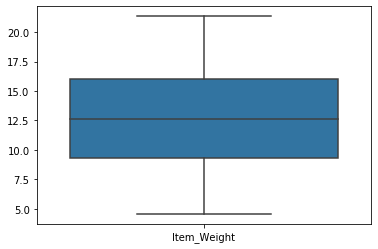

In [163]:
sn.boxplot(data=ds[["Item_Weight"]])
plt.show()

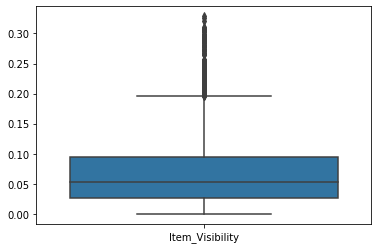

In [164]:
sn.boxplot(data=ds[["Item_Visibility"]])
plt.show()


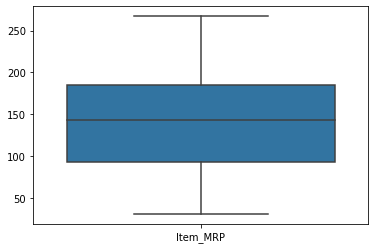

In [165]:
sn.boxplot(data=ds[["Item_MRP"]])
plt.show()


In [166]:
x=ds.drop("Item_Outlet_Sales",axis=1)
y=ds["Item_Outlet_Sales"]

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(20,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_pred,y_test)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100} found on randome_state {best_rstate}")

best accuracy 14.709564272771303 found on randome_state 80


In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_test,y_test)
y_pred=rd.predict(x_test)
r2score=r2_score(y_test,y_pred)
print(f"Accuracu is {r2score*100}")

Accuracu is 91.3585608180486


C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
